# Chapter 2. Linear regression

### 2.1. Introduction to linear regression

### 2.2. Statistical aspects of least squares

- Example 2.1: 2차 회귀 모델 사용하는 방법(polynomial feature transform 사용)

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.font_manager as fm
import matplotlib as mpl

# 예: Windows 기본 한글 글꼴 중 하나 설정 (Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 음수 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

In [93]:
# 주어진 데이터
t = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # 입력 특성 (2차원 배열로 reshape)
y = np.array([109.4, 187.5, 267.5, 331.9, 386.1, 428.4, 452.2, 498.1, 512.3, 513.0])

In [ ]:
# 다항 특성 생성 (2차)
poly = PolynomialFeatures(degree=2)
t_poly = poly.fit_transform(t)

In [95]:
# 식 (2.35) 확인해보기
t_poly_check = t_poly.copy()
t_poly_check[:, 2] *= -0.5
t_poly_check

array([[  1. ,   1. ,  -0.5],
       [  1. ,   2. ,  -2. ],
       [  1. ,   3. ,  -4.5],
       [  1. ,   4. ,  -8. ],
       [  1. ,   5. , -12.5],
       [  1. ,   6. , -18. ],
       [  1. ,   7. , -24.5],
       [  1. ,   8. , -32. ],
       [  1. ,   9. , -40.5],
       [  1. ,  10. , -50. ]])

In [96]:
# 회귀 모델 학습
model = LinearRegression()
model.fit(t_poly, y)

LinearRegression()

In [97]:
# 계수 출력 (-0.5a*t^2 + b*t + c 형태)
a, b, c = model.coef_[2], model.coef_[1], model.intercept_
print(f"회귀식: y = {a:.4f} * t^2 + {b:.4f} * t + {c:.4f}")
print('')

# y(t) = m_1 + m_2 t - (1/2)m_3 t^2
print(f"교재 regression model:")
print(f"y = {c:.4f} + {b:.4f} * t - (1/2) {a/(-0.5):.4f} * t^2")

회귀식: y = -4.7042 * t^2 + 96.9713 * t + 16.4083

교재 regression model:
y = 16.4083 + 96.9713 * t - (1/2) 9.4083 * t^2


In [98]:
# 예측값 계산
t_fit = np.linspace(1, 10, 100).reshape(-1, 1)
t_fit_poly = poly.transform(t_fit)
y_fit = model.predict(t_fit_poly)

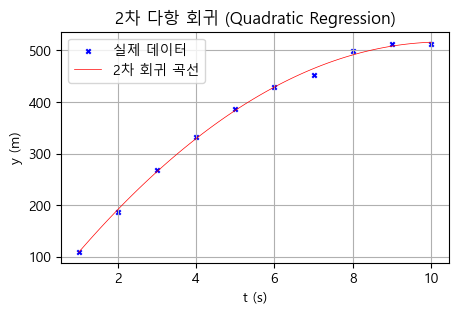

In [99]:
# 시각화
plt.figure(figsize=(5, 3))  # (가로, 세로) 단위는 인치
plt.scatter(t, y, color='blue', s=10, marker='x', label='실제 데이터')
plt.plot(t_fit, y_fit, color='red', lw=0.5, label='2차 회귀 곡선')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.title('2차 다항 회귀 (Quadratic Regression)')
plt.legend()
plt.grid(True)
plt.show()

- Example 2.1: 선형 회귀를 이용하는 방법

In [100]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 1. 데이터 정의
t = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
y = np.array([109.4, 187.5, 267.5, 331.9, 386.1, 428.4, 452.2, 498.1, 512.3, 513.0])

# 2. 디자인 행렬 구성: [1, t, -0.5 * t^2]
G = np.hstack([
    np.ones_like(t),  # c (절편)
    t,             # b 계수
    -0.5 * t**2   # a 계수와 곱해질 항
])

# 3. 선형 회귀 모델 (절편 직접 넣었으므로 fit_intercept=False)
model = LinearRegression(fit_intercept=False)
model.fit(G, y)
m_L2 = model.coef_

# 4. 알려진 오차 표준편차
sigma = 8
sigma_squared = sigma ** 2

# 5. 공분산 행렬 계산
GtG_inv = np.linalg.inv(G.T @ G)
cov_m_L2 = sigma_squared * GtG_inv

# 6. 결과 출력
print("추정된 회귀 계수 [a, b, c]:", m_L2)
print("\n오차 분산 σ² =", sigma_squared)
print("\n계수 공분산 행렬 (Cov[m_L2]):\n", cov_m_L2)


추정된 회귀 계수 [a, b, c]: [16.40833333 96.97128788  9.40833333]

오차 분산 σ² = 64

계수 공분산 행렬 (Cov[m_L2]):
 [[ 88.53333333 -33.6         -5.33333333]
 [-33.6         15.44242424   2.66666667]
 [ -5.33333333   2.66666667   0.48484848]]


In [101]:
from scipy.stats import norm

# z 값 (정규분포 기준 95% 신뢰수준)
z = norm.ppf(0.975)  # 약 1.96

# 신뢰구간 계산
conf_intervals = []
for i in range(len(m_L2)):
    se = np.sqrt(cov_m_L2[i, i])  # 표준 오차
    lower = m_L2[i] - z * se
    upper = m_L2[i] + z * se
    conf_intervals.append((lower, upper))

# 결과 출력
labels = ['m_1', 'm_2', 'm_3']
for i, (ci, est) in enumerate(zip(conf_intervals, m_L2)):
    print(f"{labels[i]} = {est:.4f},  95% 신뢰구간: ({ci[0]:.4f}, {ci[1]:.4f})")

m_1 = 16.4083,  95% 신뢰구간: (-2.0334, 34.8501)
m_2 = 96.9713,  95% 신뢰구간: (89.2692, 104.6733)
m_3 = 9.4083,  95% 신뢰구간: (8.0436, 10.7731)


In [102]:
from scipy.stats import chi2

# 예측 및 잔차
y_pred = model.predict(G)
residuals = y - y_pred

# 카이제곱 통계량 계산: RSS / sigma^2
sigma = 8
RSS = np.sum(residuals**2)
chi_squared = RSS / (sigma**2)

# 자유도
df = len(y) - G.shape[1]  # 10 - 3 = 7

# p-value 계산 (우측 누적 확률)
p_value = 1 - chi2.cdf(chi_squared, df=df)

# 출력
print(f"Chi-squared statistic: {chi_squared:.4f}")
print(f"Degrees of freedom: {df}")
print(f"p-value: {p_value:.4e}")


Chi-squared statistic: 4.1810
Degrees of freedom: 7
p-value: 7.5871e-01


- Example 2.2: Confidence ellipsoid

In [103]:
import pandas as pd

# 표준편차 벡터 (각 계수의 standard error)
std_errors = np.sqrt(np.diag(cov_m_L2))

# 상관계수 행렬 계산
corr_matrix = cov_m_L2 / (std_errors[:, None] * std_errors[None, :])
corr_df = pd.DataFrame(corr_matrix, index=labels, columns=labels)

# 결과 출력
labels = ['m_1', 'm_2', 'm_3']
print("계수 상관계수 행렬:")
print(corr_df.round(4))  # 소수점 4자리까지 보기 좋게 출력

계수 상관계수 행렬:
        m_1     m_2     m_3
m_1  1.0000 -0.9087 -0.8140
m_2 -0.9087  1.0000  0.9746
m_3 -0.8140  0.9746  1.0000


In [104]:
# 공분산 행렬의 역행렬
inv_cov = np.linalg.inv(cov_m_L2)

# 역행렬의 고유값 분해 (diagonalization)
eigvals, eigvecs = np.linalg.eig(inv_cov)

# 고유값 오름차순 정렬
idx = np.argsort(eigvals)
eigvals_sorted = eigvals[idx]
eigvecs_sorted = eigvecs[:, idx]

# 정렬된 고유값/고유벡터로 역행렬 복원
reconstructed_sorted = eigvecs_sorted @ np.diag(eigvals_sorted) @ np.linalg.inv(eigvecs_sorted)

# 출력 (예쁘게 보기 위해 옵션 설정)
np.set_printoptions(precision=4, suppress=True)
print("역행렬 (Cov⁻¹):\n", inv_cov)
print("정렬된 고유값 (Λ):\n", eigvals_sorted)
print("\n정렬된 고유벡터 행렬 (Q):\n", eigvecs_sorted)
print("\nQ Λ Q⁻¹ 복원 결과 (정렬된 고유값 기준):\n", reconstructed_sorted)

역행렬 (Cov⁻¹):
 [[  0.1562   0.8594  -3.0078]
 [  0.8594   6.0156 -23.6328]
 [ -3.0078 -23.6328  98.957 ]]
정렬된 고유값 (Λ):
 [  0.0098   0.4046 104.7145]

정렬된 고유벡터 행렬 (Q):
 [[-0.93    0.3663 -0.0299]
 [ 0.3629  0.9022 -0.233 ]
 [ 0.0584  0.2275  0.972 ]]

Q Λ Q⁻¹ 복원 결과 (정렬된 고유값 기준):
 [[  0.1563   0.8594  -3.0078]
 [  0.8594   6.0156 -23.6328]
 [ -3.0078 -23.6328  98.957 ]]


In [105]:
# 신뢰수준 (95%)에 해당하는 카이제곱 분위값
p = 3  # 계수 개수
chi2_val = chi2.ppf(0.95, df=p)

# 95% 신뢰 타원체의 반축 길이 (semiaxis)
semiaxes = np.sqrt(chi2_val / eigvals_sorted)

# 출력
np.set_printoptions(precision=4, suppress=True)
print("고유값 (오름차순):", eigvals_sorted)
print("95% 신뢰수준 Chi² 값:", chi2_val)
print("신뢰 타원체의 반축 길이 (semiaxes):", semiaxes)

고유값 (오름차순): [  0.0098   0.4046 104.7145]
95% 신뢰수준 Chi² 값: 7.814727903251179
신뢰 타원체의 반축 길이 (semiaxes): [28.2301  4.395   0.2732]


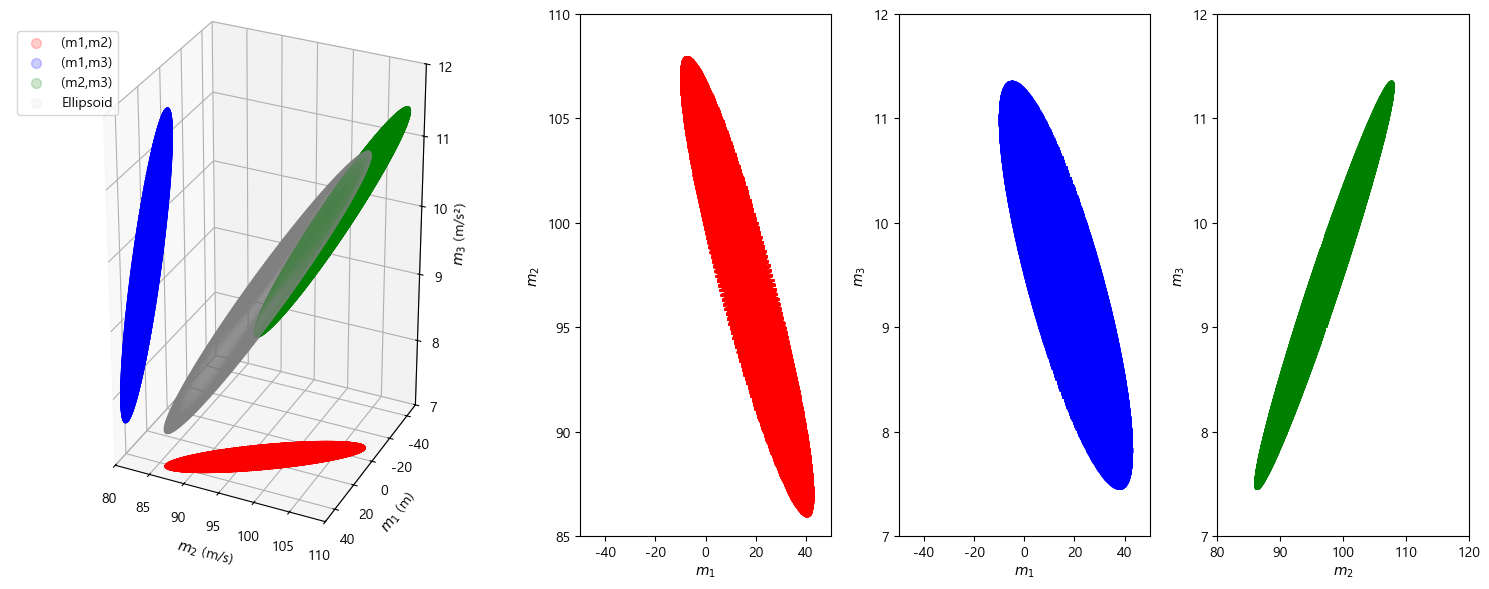

In [106]:
import matplotlib.gridspec as gridspec

# 구면 생성
u = np.linspace(0, 2 * np.pi, 300)
v = np.linspace(0, np.pi, 300)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones_like(u), np.cos(v))
sphere = np.stack([x, y, z], axis=-1).reshape(-1, 3)

# 회전, 스케일, 이동
trans_axes = eigvecs_sorted @ np.diag(semiaxes)
ellipsoid = (trans_axes @ sphere.T).T + m_L2

# 투영
projections = [
    (ellipsoid[:, 0], ellipsoid[:, 1]),  # m1-m2
    (ellipsoid[:, 0], ellipsoid[:, 2]),  # m1-m3
    (ellipsoid[:, 1], ellipsoid[:, 2])   # m2-m3
]
labels = [('$m_1$', '$m_2$'), ('$m_1$', '$m_3$'), ('$m_2$', '$m_3$')]
lims = [[-50, 50, 85, 110], [-50, 50, 7, 12], [80, 120, 7, 12]]
colors = ['r', 'b', 'g']

# GridSpec으로 2:1:1:1 비율 subplot 배치
fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, 4, width_ratios=[2, 1, 1, 1], figure=fig)

# 3D Plot
ax3d = fig.add_subplot(gs[0], projection='3d')
ax3d.scatter(ellipsoid[:, 1], ellipsoid[:, 0], np.full_like(ellipsoid[:, 2], 7),
             s=0.5, color='r', alpha=0.2, label='(m1,m2)')
ax3d.scatter(np.full_like(ellipsoid[:, 1], 80), ellipsoid[:, 0], ellipsoid[:, 2],
             s=0.5, color='b', alpha=0.2, label='(m1,m3)')
ax3d.scatter(ellipsoid[:, 1], np.full_like(ellipsoid[:, 0], -50), ellipsoid[:, 2],
             s=0.5, color='g', alpha=0.2, label='(m2,m3)')
ax3d.scatter(ellipsoid[:, 1], ellipsoid[:, 0], ellipsoid[:, 2],
             s=0.5, color='gray', alpha=0.05, label="Ellipsoid")

ax3d.set_ylabel('$m_1$ (m)')
ax3d.set_xlabel('$m_2$ (m/s)')
ax3d.set_zlabel('$m_3$ (m/s²)')
ax3d.set_ylim(-50, 50)
ax3d.set_xlim(110, 80)
ax3d.set_zlim(7, 12)
ax3d.view_init(elev=30, azim=115)
ax3d.set_box_aspect((1, 1, 1.7))
ax3d.legend(markerscale=10)

# 2D 평면 슬라이스
for i, (proj, (lx, ly), lim, color) in enumerate(zip(projections, labels, lims, colors), start=1):
    ax = fig.add_subplot(gs[i])
    ax.scatter(proj[0], proj[1], s=0.5, color=color, alpha=0.5)
    ax.set_xlabel(lx)
    ax.set_ylabel(ly)
    ax.set_xlim(lim[0], lim[1])
    ax.set_ylim(lim[2], lim[3])

plt.tight_layout()
plt.show()

In [107]:
# semiaxis length를 회귀좌표계로 변환
semiaxes_matrix = np.diag(semiaxes)
semiaxis_vectors = eigvecs_sorted @ semiaxes_matrix

# 출력
np.set_printoptions(precision=4, suppress=True)
print("회귀좌표계에서의 타원:\n", semiaxis_vectors)

회귀좌표계에서의 타원:
 [[-26.254    1.6101  -0.0082]
 [ 10.2445   3.9653  -0.0637]
 [  1.6488   1.       0.2655]]


타원체 중 제일 긴 축의 반지름을 회귀좌표로 변환한 벡터가 bounding box의 폭의 절반을 나타내게 됨.

따라서, P*diag(eigenvalues)의 첫번째 column이 신뢰구간의 절반이 됨.

In [108]:
# 신뢰구간 계산
se = semiaxis_vectors[:,0]
conf_intervals = []
for i in range(len(m_L2)):
    lower = m_L2[i] - abs(se[i])
    upper = m_L2[i] + abs(se[i])
    conf_intervals.append((lower, upper))

labels = ['m_1', 'm_2', 'm_3']
for i, (ci, est) in enumerate(zip(conf_intervals, m_L2)):
    print(f"{labels[i]} = {est:.4f},  95% 신뢰구간: ({ci[0]:.4f}, {ci[1]:.4f})")

m_1 = 16.4083,  95% 신뢰구간: (-9.8456, 42.6623)
m_2 = 96.9713,  95% 신뢰구간: (86.7267, 107.2158)
m_3 = 9.4083,  95% 신뢰구간: (7.7596, 11.0571)


### 2.3. AN ALTERNATIVE VIEW OF THE 95% CONFIDENCE ELLIPSOID

### 2.4. UNKNOWN MEASUREMENT STANDARD DEVIATIONS

- Example 2.3: No data

### 2.5. $L_1$ REGRESSION

- Example 2.4

In [109]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 정의 - Outlier 추가
t = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
y = np.array([109.4, 187.5, 267.5, 331.9 - 200, 386.1, 428.4, 452.2, 498.1, 512.3, 513.0])

# forward operator 행렬 구성: [1, t, -0.5 * t^2]
G = np.hstack([
    np.ones_like(t),  # m_1 (절편)
    t,             # m_2 계수
    -0.5 * t**2   # m_3 계수와 곱해질 항
])

# 선형 회귀 모델 (절편 직접 넣었으므로 fit_intercept=False)
model = LinearRegression(fit_intercept=False)
model.fit(G, y)
m_L2 = model.coef_
print("추정된 회귀 계수 [m_1, m_2, m_3]:", m_L2)

추정된 회귀 계수 [m_1, m_2, m_3]: [26.4083 75.6077  4.8629]


In [110]:
from scipy.stats import chi2

# 예측 및 잔차
y_pred = model.predict(G)
residuals = y - y_pred

# 카이제곱 통계량 계산: RSS / sigma^2
sigma = 8
RSS = np.sum(residuals**2)
chi_squared = RSS / (sigma**2)

# 자유도
df = len(y) - G.shape[1]  # 10 - 3 = 7

# p-value 계산 (우측 누적 확률)
p_value = 1 - chi2.cdf(chi_squared, df=df)

# 출력
print(f"Chi-squared statistic: {chi_squared:.4f}")
print(f"Degrees of freedom: {df}")
print(f"p-value: {p_value:.4e}")

Chi-squared statistic: 489.0645
Degrees of freedom: 7
p-value: 0.0000e+00


In [111]:
##### L_1 regression ######

# 초기화(L_2 regression 해를 초깃값으로 사용)
m_iter = m_L2

# forward operator 행렬 구성: [1, t, -0.5 * t^2]
G = np.hstack([
    np.ones_like(t),  # m_1 (절편)
    t,             # m_2 계수
    -0.5 * t**2   # m_3 계수와 곱해질 항
])

max_iter = 50
tol = 0.0003
eps = 1.e-32
print(f"iteration {0} [m_1, m_2, m_3]:", m_iter)

for i in range(max_iter):
    # 이전 반복의 모델 매개변수 저장
    m_prev = m_iter.copy()
    
    # residual의 역수로 weight matrix 구성
    y_pred = G @ m_iter
    resid = np.abs(y - y_pred)
    resid = np.maximum(resid, eps) # threshold: avoid numerical instability
    R = np.diag(1./resid)

    # weighted LS solution
    m_iter = np.linalg.inv(G.T @ R @ G) @ (G.T @ R @ y) 

    # stopping criterion
    delta_m = m_iter - m_prev
    tau = np.linalg.norm(delta_m) / (1 + np.linalg.norm(m_iter))
    print(f"iteration {i+1} [m_1, m_2, m_3]:", m_iter)
    print(f"tau_current = {tau:.6f}\n")
    if tau < tol:
        print(f"수렴 조건 충족! {i+1}번째 반복에서 종료됨.")
        m_L1 = m_iter
        print(f"iteration {i+1} [m_1, m_2, m_3]:", m_L1)
        break

iteration 0 [m_1, m_2, m_3]: [26.4083 75.6077  4.8629]
iteration 1 [m_1, m_2, m_3]: [22.7964 89.36    7.7975]
tau_current = 0.155192

iteration 2 [m_1, m_2, m_3]: [21.1493 92.0146  8.3486]
tau_current = 0.033120

iteration 3 [m_1, m_2, m_3]: [19.6383 93.5567  8.6505]
tau_current = 0.022478

iteration 4 [m_1, m_2, m_3]: [18.4906 94.8554  8.9089]
tau_current = 0.017871

iteration 5 [m_1, m_2, m_3]: [17.9946 95.548   9.0504]
tau_current = 0.008754

iteration 6 [m_1, m_2, m_3]: [18.1789 95.5388  9.0554]
tau_current = 0.001870

iteration 7 [m_1, m_2, m_3]: [18.2872 95.5322  9.0595]
tau_current = 0.001100

iteration 8 [m_1, m_2, m_3]: [18.329  95.5475  9.0671]
tau_current = 0.000457

iteration 9 [m_1, m_2, m_3]: [18.3332 95.5761  9.077 ]
tau_current = 0.000309

iteration 10 [m_1, m_2, m_3]: [18.3164 95.6129  9.0884]
tau_current = 0.000426

iteration 11 [m_1, m_2, m_3]: [18.2877 95.6551  9.101 ]
tau_current = 0.000532

iteration 12 [m_1, m_2, m_3]: [18.2521 95.7012  9.1143]
tau_current = 0.00

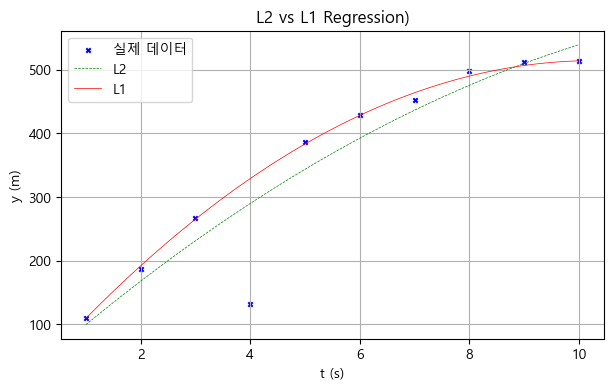

In [112]:
# 예측값 계산
t_fit = np.linspace(1, 10, 100).reshape(-1, 1)
G_fit = np.hstack([
    np.ones_like(t_fit),         # m_1 절편 항
    t_fit,                       # m_2 계수와 곱해질 항
    -0.5 * t_fit**2              # m_3 계수와 곱해질 항
])
y_fit_L2 = G_fit @ m_L2
y_fit_L1 = G_fit @ m_L1

# 시각화
plt.figure(figsize=(7, 4))  # (가로, 세로) 단위는 인치
plt.scatter(t, y, color='blue', s=10, marker='x', label='실제 데이터')
plt.plot(t_fit, y_fit_L2, color='green', lw=0.5, ls='--', label='L2')
plt.plot(t_fit, y_fit_L1, color='red', lw=0.5, label='L1')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.title('L2 vs L1 Regression)')
plt.legend()
plt.grid(True)
plt.show()

### 2.6.  MONTE CARLO ERROR PROPAGATION

- Example 2.5

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Setup
np.random.seed(42)
num_mc = 10000  # Monte Carlo 반복 횟수

# 데이터 정의
t = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
y_clean = np.array([109.4, 187.5, 267.5, 331.9 - 200, 386.1, 428.4, 452.2, 498.1, 512.3, 513.0])
y_noisy = y_clean.copy()

# forward operator G: [1, t, -0.5 * t^2]
G = np.hstack([np.ones_like(t), t, -0.5 * t**2])
n_params = G.shape[1]

# IRLS 함수 (L1 최소화 근사)
def IRLS(G, y, eps=3.*1e-4, max_iter=50, tol=1e-32):
    m = np.zeros(G.shape[1])
    for _ in range(max_iter):
        y_pred = G @ m
        resid = np.abs(y - y_pred)
        resid = np.maximum(resid, eps)
        R = np.diag(1. / resid)
        m_new = np.linalg.inv(G.T @ R @ G) @ (G.T @ R @ y)
        if np.linalg.norm(m_new - m) / (1 + np.linalg.norm(m_new)) < tol:
            break
        m = m_new
    return m

# L1 baseline solution
mL1_base = IRLS(G, y_clean)
db = G @ mL1_base  # noise-free baseline data

# Monte Carlo 시뮬레이션
noise_std = 8  # 예시: 표준편차 8인 노이즈
model_ensemble = []

for _ in range(num_mc):
    eta = np.random.normal(0, noise_std, size=db.shape)
    y_sim = db + eta
    m_sim = IRLS(G, y_sim)
    model_ensemble.append(m_sim)

model_ensemble = np.array(model_ensemble)
mean_model = np.mean(model_ensemble, axis=0)


In [114]:
# Covariance matrix 계산 (A^T A / q)
A = model_ensemble - mean_model
cov_matrix = A.T @ A / num_mc
cov_matrix

array([[129.2592, -48.3266,  -7.6057],
       [-48.3266,  21.97  ,   3.7756],
       [ -7.6057,   3.7756,   0.6849]])

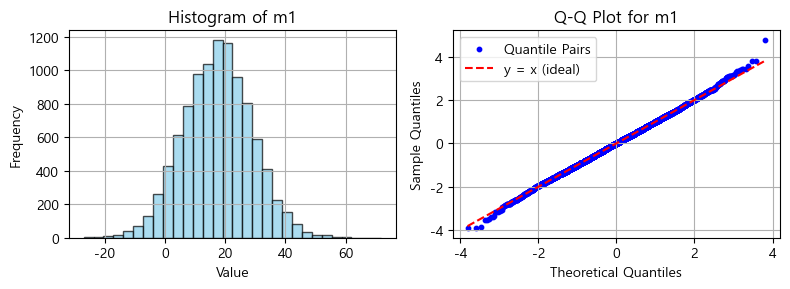

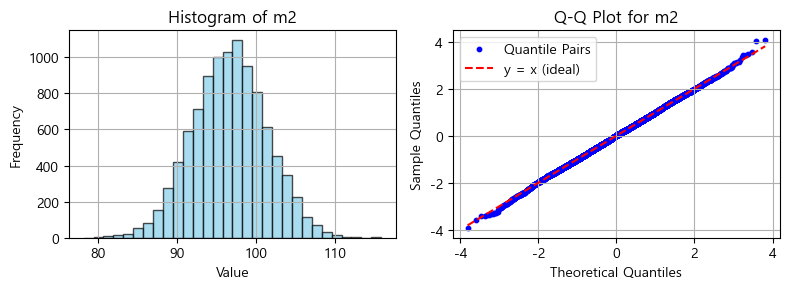

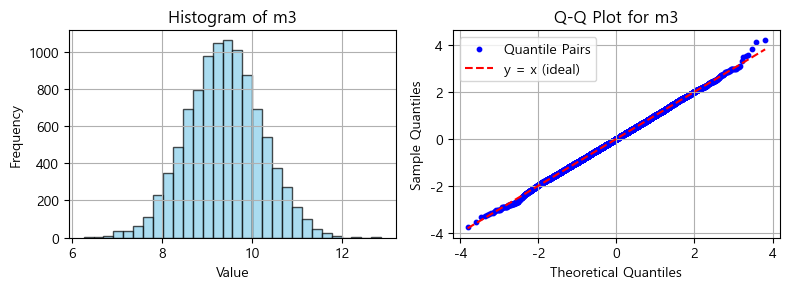

In [115]:
param_labels = ['m1', 'm2', 'm3']
num_params = 3

for i in range(num_params):
    samples = model_ensemble[:, i]

    # 히스토그램
    plt.figure(figsize=(8, 3))

    plt.subplot(1, 2, 1)
    plt.hist(samples, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {param_labels[i]}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)

    # Q-Q plot (직접 그리기)
    samples_norm = (samples - np.mean(samples)) / np.std(samples)
    theoretical_q, sample_q = stats.probplot(samples_norm, dist="norm", fit=False)
    plt.subplot(1, 2, 2)
    plt.scatter(theoretical_q, sample_q, s=10, color='blue', label='Quantile Pairs')
    plt.plot(theoretical_q, theoretical_q, 'r--', label='y = x (ideal)')
    plt.title(f"Q-Q Plot for {param_labels[i]}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [116]:
# 신뢰수준
lower_percentile = 2.5
upper_percentile = 97.5

# 평균 및 분위수 계산
mean_params = np.mean(model_ensemble, axis=0)
ci_lower = np.percentile(model_ensemble, lower_percentile, axis=0)
ci_upper = np.percentile(model_ensemble, upper_percentile, axis=0)

# 출력
param_labels = ['m1', 'm2', 'm3']
print("95% 신뢰구간 (Monte Carlo 기반):\n")

for i in range(model_ensemble.shape[1]):
    print(f"{param_labels[i]}: 평균={mean_params[i]:.4f}, "
          f"신뢰구간=({ci_lower[i]:.4f}, {ci_upper[i]:.4f})")

95% 신뢰구간 (Monte Carlo 기반):

m1: 평균=17.4665, 신뢰구간=(-4.2965, 39.8755)
m2: 평균=96.6384, 신뢰구간=(87.5380, 105.7306)
m3: 평균=9.3819, 신뢰구간=(7.7904, 11.0129)
